In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib 
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score

In [83]:
df=pd.read_csv('medical_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [84]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [85]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [87]:
df.shape

(2772, 7)

In [88]:
df.duplicated().sum()

np.int64(1435)

In [89]:
df.drop_duplicates(inplace=True)

In [90]:
df.shape

(1337, 7)

In [91]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


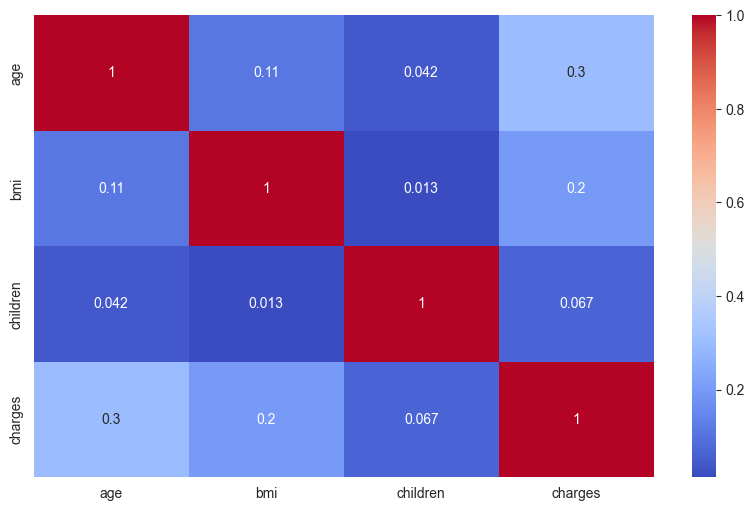

In [92]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

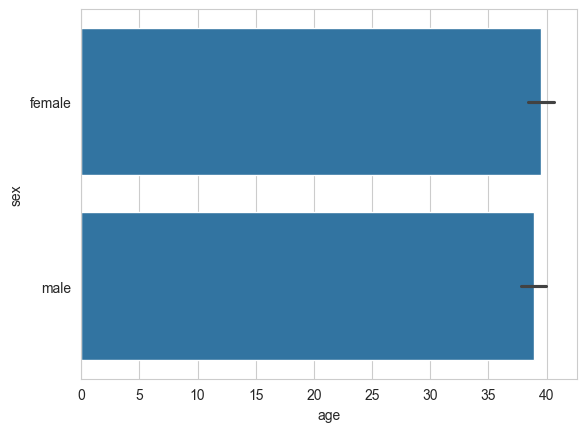

In [93]:
sns.barplot(data=df,x='age',y='sex')
plt.show()

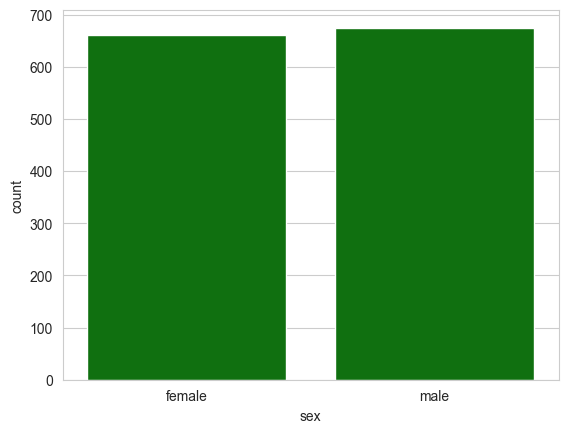

In [94]:
sns.countplot(data=df,x='sex',color='green')
sns.set_style("whitegrid")
plt.show()

In [95]:
numeric_cols=df.select_dtypes(include=['int64','float64']).columns

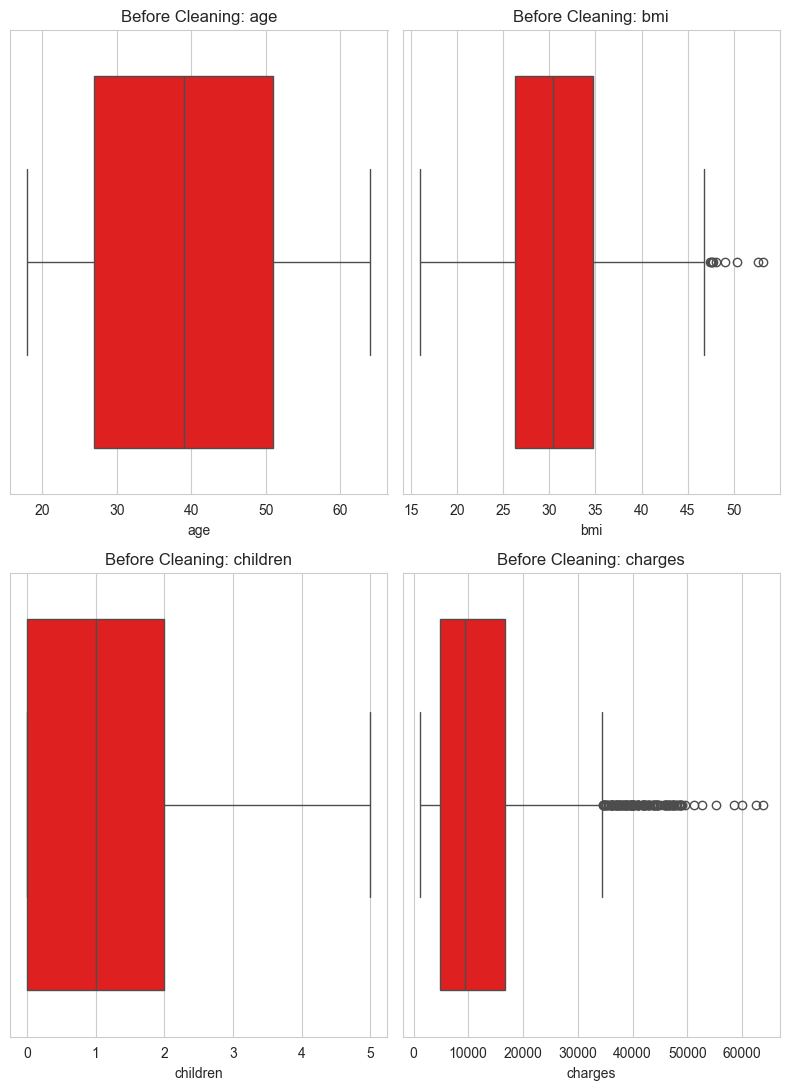

In [96]:

plt.figure(figsize=(8, 16))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//2 + 1, 2, i)
    sns.boxplot(x=df[col],color='red')
    plt.title(f"Before Cleaning: {col}")
plt.tight_layout()
plt.show()

In [97]:
numeric_cols=df.select_dtypes(include=['int64','float64']).columns

<Axes: xlabel='charges'>

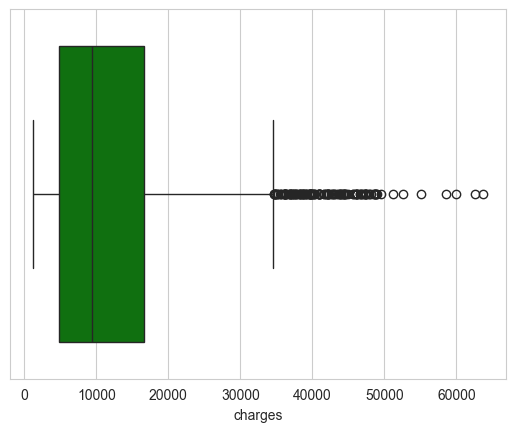

In [98]:
sns.boxplot(data=df,x='charges',color='green')

In [99]:
col_outlier=['charges','bmi']
select_col=df[col_outlier]

In [100]:
Q1=select_col.quantile(0.25)
Q3=select_col.quantile(0.75)
IQR=Q3-Q1

In [101]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [102]:
lower_bound

charges   -13120.716175
bmi           13.675000
dtype: float64

In [103]:
df_clean = df[
    (df['bmi'] >= lower_bound['bmi']) & (df['bmi'] <= upper_bound['bmi']) &
    (df['charges'] >= lower_bound['charges']) & (df['charges'] <= upper_bound['charges'])
]

print("Original shape:", df.shape)
print("Cleaned shape:", df_clean.shape)


Original shape: (1337, 7)
Cleaned shape: (1192, 7)


<Axes: xlabel='charges'>

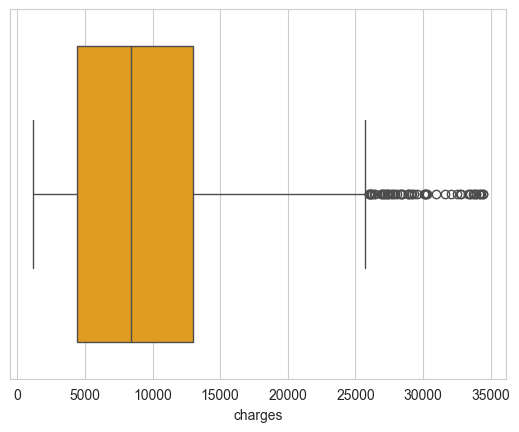

In [104]:
sns.boxplot(data=df_clean,x='charges',color='orange')

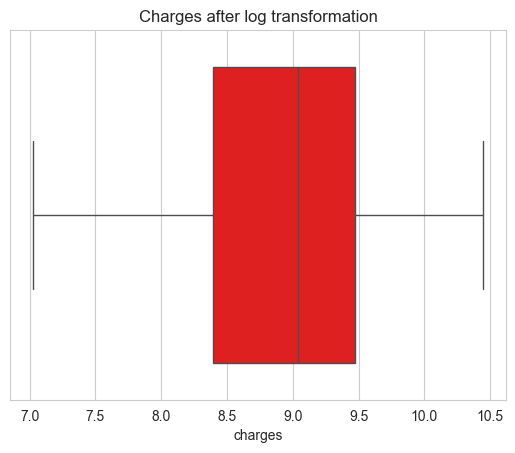

In [105]:
sns.boxplot(x=np.log(df_clean['charges']), color="red")
plt.title("Charges after log transformation")
plt.show()

<Axes: xlabel='bmi'>

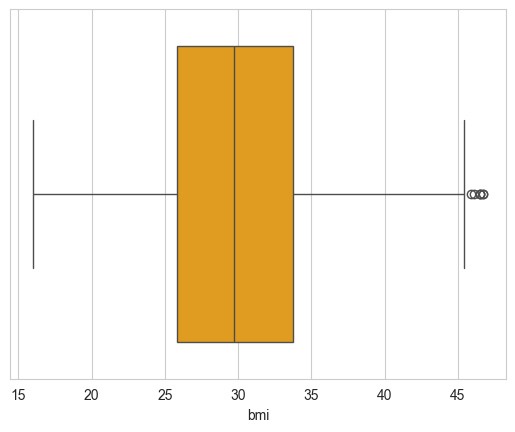

In [106]:
sns.boxplot(data=df_clean,x='bmi',color='orange')

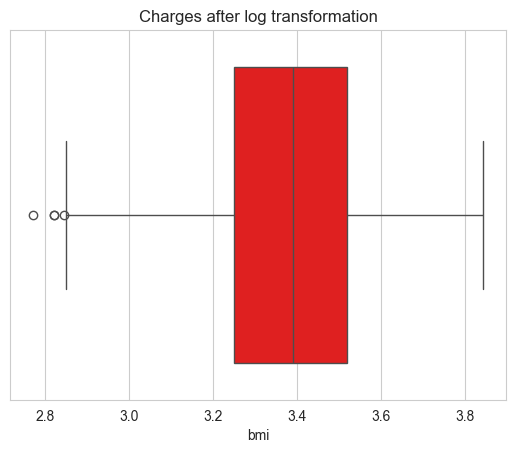

In [107]:
sns.boxplot(x=np.log(df_clean['bmi']), color="red")
plt.title("Charges after log transformation")
plt.show()

In [108]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


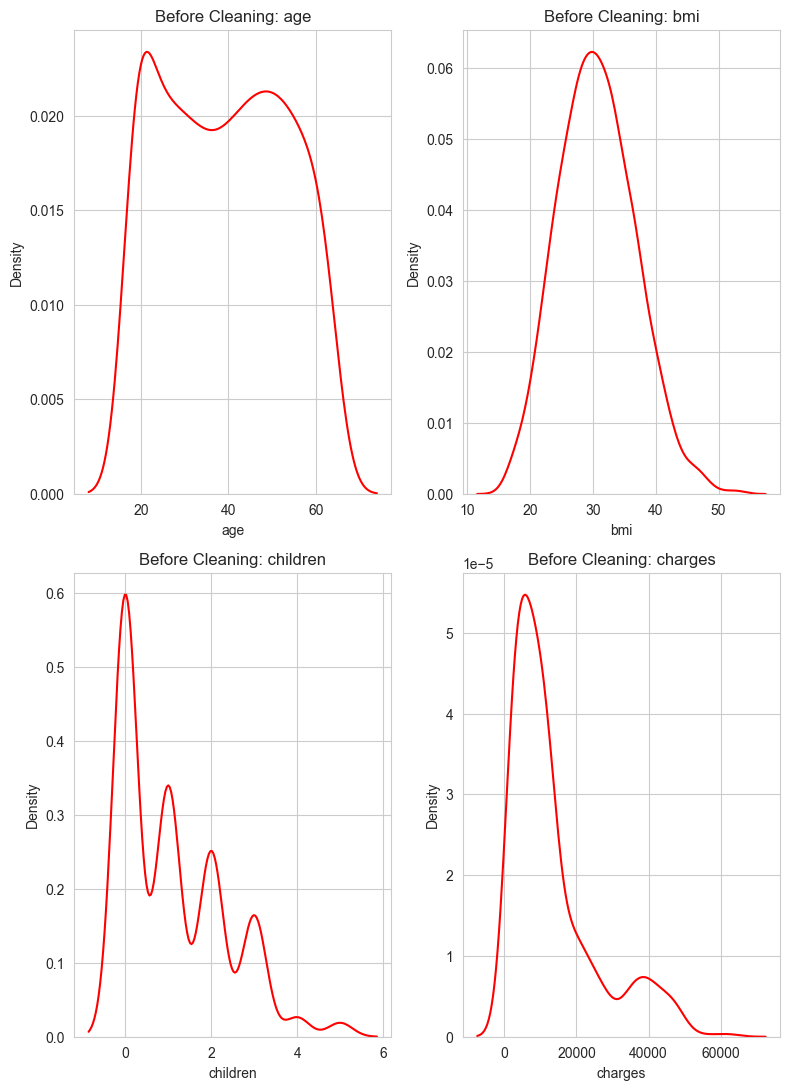

In [109]:
numeric_cols=df.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(8, 16))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//2 + 1, 2, i)
    sns.kdeplot(x=df[col],color='red')
    plt.title(f"Before Cleaning: {col}")
plt.tight_layout()
plt.show()

In [110]:
col_skews=['children','charges']
df[col_skews]=np.sqrt(df[col_skews])

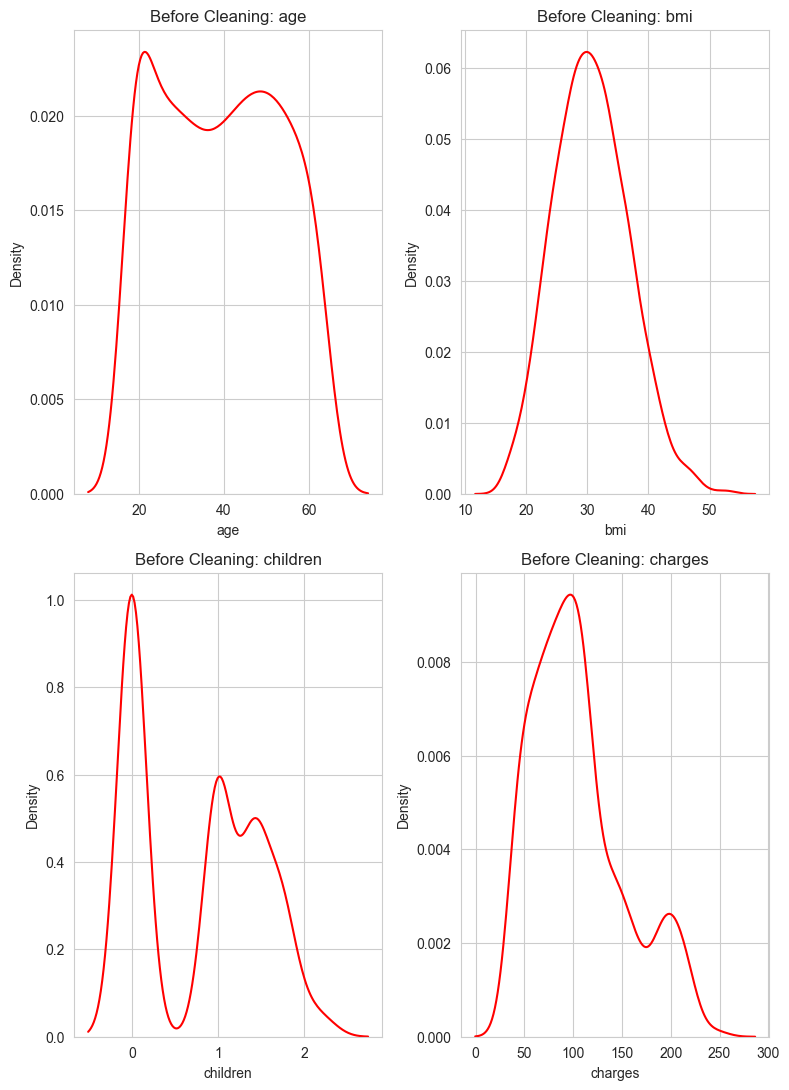

In [111]:
numeric_cols=df.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(8, 16))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//2 + 1, 2, i)
    sns.kdeplot(x=df[col],color='red')
    plt.title(f"Before Cleaning: {col}")
plt.tight_layout()
plt.show()

In [112]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.000000,yes,southwest,129.942002
1,18,male,33.770,1.000000,no,southeast,41.539768
2,28,male,33.000,1.732051,no,southeast,66.704288
3,33,male,22.705,0.000000,no,northwest,148.271611
4,32,male,28.880,0.000000,no,northwest,62.184043


In [113]:
numeric_cols = ['age', 'bmi', 'children']
categorical_cols = ['sex', 'smoker', 'region']

In [114]:
preprocessing = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
    ]
)

In [115]:
preprocessing


ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['age', 'bmi', 'children']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index(['sex', 'smoker', 'region'], dtype='object'))])

In [116]:
pipeline=Pipeline(steps=[
    ('preprocessing',preprocessing),
    ('model',LinearRegression())
])

In [117]:
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['sex', 'smoker', 'region'], dtype='object'))])),
                ('model', LinearRegression())])

In [118]:
X=df.drop('charges',axis=1)
y=df['charges']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [120]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['sex', 'smoker', 'region'], dtype='object'))])),
                ('model', LinearRegression())])

In [121]:
y_pred = pipeline.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 414.0327399011165
R² Score: 0.8443111702128677


In [122]:
from sklearn.metrics import r2_score

# Training accuracy
y_train_pred = pipeline.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

# Testing accuracy
y_test_pred = pipeline.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)

print("Train R²:", train_r2)
print("Test R²:", test_r2)


Train R²: 0.758574231908365
Test R²: 0.8443111702128677
